# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [68]:
df_twitter_archive_enchanced=pd.read_csv("twitter-archive-enhanced.csv")

In [69]:
df_twitter_archive_enchanced.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
796,773247561583001600,NaN,NaN,2016-09-06 19:52:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He's a pupholder. Comes with the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773247561...,10,10,Chip,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [70]:

import requests

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r=requests.get(url)
file_name=url.split("/")[-1]
with open (file_name,"wb") as filname:
      filname.write(r.content) 



In [71]:
df_image_predictions=pd.read_csv("image-predictions.tsv",sep='\t')

In [72]:
df_image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [73]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive_enchanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        #print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
          #  print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
#print(end - start)
#print(fails_dict)

In [74]:
#i have used the tweet-json.text file support and converted into data frame

In [75]:
pizzatext=[json.loads(line) for line in open("tweet-json.txt","r")]
df_tweet_json=pd.DataFrame(pizzatext)


In [76]:
df_tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [77]:
df_retweet_and_favorite=df_tweet_json[['retweet_count','favorite_count','id']]

In [78]:
#df_retweet_and_favorite.isnull().sum()

In [79]:
df_tweet_json[['retweet_count','favorite_count']][df_tweet_json['id'] ==778027034220126208]

,retweet_count,favorite_count
762,1885,7320


In [80]:
#df_twitter_archive_enchanced[df_twitter_archive_enchanced['tweet_id']==891815181378084864]


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [81]:
df_twitter_archive_enchanced.sample(1)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None


In [82]:
df_twitter_archive_enchanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [83]:
df_twitter_archive_enchanced[df_twitter_archive_enchanced['retweeted_status_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [84]:
df_twitter_archive_enchanced[['name','doggo','floofer','pupper','puppo']]

,name,doggo,floofer,pupper,puppo
0,Phineas,None,None,None,None
1,Tilly,None,None,None,None
2,Archie,None,None,None,None
3,Darla,None,None,None,None
4,Franklin,None,None,None,None
5,None,None,None,None,None
6,Jax,None,None,None,None
7,None,None,None,None,None
8,Zoey,None,None,None,None
9,Cassie,doggo,None,None,None


In [85]:
df_twitter_archive_enchanced[['name','puppo']][df_twitter_archive_enchanced['puppo']=="puppo"]

,name,puppo
12,None,puppo
14,Stuart,puppo
71,Snoopy,puppo
94,Sebastian,puppo
129,Shikha,puppo
168,None,puppo
191,None,puppo
395,None,puppo
397,Pablo,puppo
398,Pablo,puppo


In [86]:
df_twitter_archive_enchanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [87]:
df_twitter_archive_enchanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [88]:
df_image_predictions['tweet_id']

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
5       666050758794694657
6       666051853826850816
7       666055525042405380
8       666057090499244032
9       666058600524156928
10      666063827256086533
11      666071193221509120
12      666073100786774016
13      666082916733198337
14      666094000022159362
15      666099513787052032
16      666102155909144576
17      666104133288665088
18      666268910803644416
19      666273097616637952
20      666287406224695296
21      666293911632134144
22      666337882303524864
23      666345417576210432
24      666353288456101888
25      666362758909284353
26      666373753744588802
27      666396247373291520
28      666407126856765440
29      666411507551481857
               ...        
2045    886366144734445568
2046    886680336477933568
2047    886736880519319552
2048    886983233522544640
2049    887101392804085760
2050    887343217045368832
2

In [89]:
df_retweet_and_favorite.duplicated().sum()

0

### Quality issues
1.redundant retweets rows

2.redundant "in reply to users' tweet" rows

3.dogs without names, but given names of "a" or "an" instead of "None"

4.some rating_denominator do not equal 10

5.wrong Data types of "timestamp", "tweet_id"

6.the rows in sources columns are over 95% duplicated

7.wrong rating_numerators in tweet_id 883482846933004288, 778027034220126208, given the number after the decimal point instead of whole numbers

image_pred_df

8.many predictions contains 3 false in image_pred_df, which means those are useless prediction data.

### Tidiness issues
df_twitter_archive_enchanced

1.redundent columns of same category, which is now divided into ["doggo", "flooter", "pupper", "puppo"] columns, but we only need one "stage" column

2."retweet count" and "favorite count" columns are not in the df_twitter_archive_enchanced


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [90]:
# Make copies of original pieces of data
df_twitter_archive_enchanced_clean = df_twitter_archive_enchanced.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_retweet_and_favorite_clean = df_retweet_and_favorite.copy()

### Step 1: fixing important  value

no missing important values



### step 2  covering  the tidiness issues

1.redundent unecessery columns of same category, which is now divided into ["doggo", "flooter", "pupper", "puppo"] columns, but we only need one "stage" column

#### Define:convert ["doggo", "flooter", "pupper", "puppo"] columns into one "stage" column, then drop the four columns.

#### Code

In [91]:
df_twitter_archive_enchanced_clean['stage']=None
df_twitter_archive_enchanced_clean['stage'] = df_twitter_archive_enchanced_clean.doggo + df_twitter_archive_enchanced_clean.floofer + df_twitter_archive_enchanced_clean.pupper + df_twitter_archive_enchanced_clean.puppo


In [92]:
df_twitter_archive_enchanced_clean['stage'].value_counts()


NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: stage, dtype: int64

In [93]:
df_twitter_archive_enchanced_clean['stage'] = df_twitter_archive_enchanced_clean['stage'].apply(lambda x: x.replace("None",""))


In [94]:
df_twitter_archive_enchanced_clean.loc[df_twitter_archive_enchanced_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_twitter_archive_enchanced_clean.loc[df_twitter_archive_enchanced_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_twitter_archive_enchanced_clean.loc[df_twitter_archive_enchanced_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'


In [95]:
df_twitter_archive_enchanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

#### Test

In [96]:
df_twitter_archive_enchanced_clean['stage'].value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

### Issue #2: retweet count" and "favorite count" columns are not in the df_twitter_archive_enchanced



#### Define  merge "retweet_count_and_favorite_count" with twitter_clean_df on tweet_id

#### Code 

In [97]:
df_retweet_and_favorite_clean = pd.DataFrame(df_retweet_and_favorite_clean, columns=["id", "retweet_count", "favorite_count"])

In [98]:
df_retweet_and_favorite_clean['tweet_id']=df_retweet_and_favorite_clean['id']

In [99]:
df_retweet_and_favorite_clean = pd.DataFrame(df_retweet_and_favorite_clean, columns=["tweet_id", "retweet_count", "favorite_count"])
df_twitter_archive_enchanced_clean.tweet_id = df_twitter_archive_enchanced_clean.tweet_id.astype('int')
df_twitter_archive_enchanced_clean = pd.merge(df_twitter_archive_enchanced_clean, df_retweet_and_favorite_clean,
                on=['tweet_id'], how='left')

#### Test

In [100]:
df_twitter_archive_enchanced_clean.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [101]:
df_twitter_archive_enchanced_clean.favorite_count.describe()


count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

 ### Step 3: handling quality issue

- redundant retweets rows


Define: Find the index of retweets, then remove retweets rows and [ 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'] columns

In [102]:
df_twitter_archive_enchanced_clean[df_twitter_archive_enchanced_clean["retweeted_status_id"].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,,NaN,NaN
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,,108.0,0.0
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,,19297.0,0.0
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,,7181.0,0.0
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,,1349.0,0.0
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,,6965.0,0.0
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,pupper,83.0,0.0
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,,15546.0,0.0
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,,12518.0,0.0
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,pupper,1667.0,0.0


In [103]:
retweets_index = list(df_twitter_archive_enchanced_clean[df_twitter_archive_enchanced_clean["retweeted_status_id"].isnull()==False].index)

df_twitter_archive_enchanced_clean.drop(axis=0, index=retweets_index, inplace=True)


In [104]:
df_twitter_archive_enchanced_clean.drop(['in_reply_to_user_id', 
                       'in_reply_to_status_id'],
                      axis=1,
                      inplace=True)

In [105]:
df_twitter_archive_enchanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         2175 non-null object
retweet_count                 2175 non-null float64
favorite_count                2175 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


- dogs without names, but given names of "a" or "an" instead of None

Define: find the list of wrong names and use for loop to give indvidual name "None".


In [106]:
wr_name_list = list(df_twitter_archive_enchanced_clean.query('name == "a" or name == "an"').index)


In [107]:
for i in wr_name_list:
    df_twitter_archive_enchanced_clean.name[i] = "None"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


- wrong Data types of "timestamp", "tweet_id"


In [108]:
df_twitter_archive_enchanced_clean.timestamp = df_twitter_archive_enchanced_clean.timestamp.astype('datetime64')
df_twitter_archive_enchanced_clean.tweet_id = df_twitter_archive_enchanced_clean.tweet_id.astype(str)

In [109]:
df_twitter_archive_enchanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         2175 non-null object
retweet_count                 2175 non-null float64
favorite_count                2175 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 334.9+ KB


1-the rows in sources columns are 95% duplicated

In [110]:
df_twitter_archive_enchanced_clean.drop("source",axis=1,inplace=True)

  - rating_denominator  not equal 10
  so we get rid of it


In [111]:
not_ten = list(df_twitter_archive_enchanced_clean.query("rating_denominator != 10").index)
df_twitter_archive_enchanced_clean.drop(index=not_ten, inplace=True)

many predictions contains 3 false in df_image_predictions, which means those are useless prediction data.

In [112]:
fls_3 = list(df_image_predictions_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index)
df_image_predictions_clean.drop(index=fls_3,inplace=True)

In [113]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


In [114]:
df_twitter_archive_enchanced_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True,axis=1)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [115]:
df_image_predictions_clean.to_csv('image_pred_wrangled.csv')
df_twitter_archive_enchanced_clean.reset_index(drop=True)
df_twitter_archive_enchanced_clean.to_csv('twitter_archive_master.csv')
df = pd.read_csv('twitter_archive_master.csv')
df_image=pd.read_csv("image_pred_wrangled.csv")
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head()


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774.0,41048.0


In [116]:
df_image.drop('Unnamed: 0',axis=1, inplace=True)
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
7,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
8,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
9,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


In [117]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
7,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
8,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
9,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Question :
1. Are the ratings by WeRateDogs relative to the retweet count and favorite count?


2. Which stage of dogs got the highest retweet counts ?

3. which stage of dogs got the highest favourite counts?

In [118]:
df.rating_denominator.value_counts()
df.rating_denominator.isnull().sum()

0

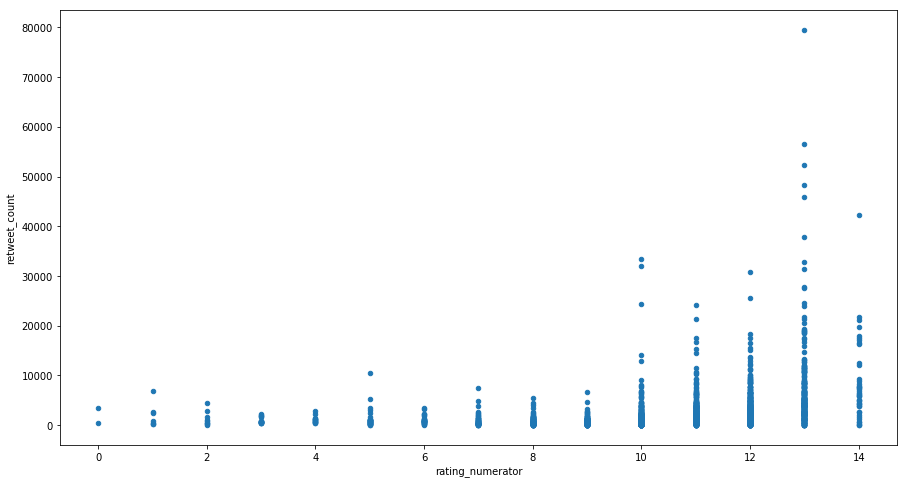

In [119]:
#look  at the relationship between 'rating_numerator' and 'retweet_count'

df[df['rating_numerator']<15].plot(x='rating_numerator',y='retweet_count',kind='scatter',figsize=(15,8));


there  ralation  between the retweet_count and rating_numerator but if the rating_numerator below 15

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 10 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null object
text                  2153 non-null object
expanded_urls         2099 non-null object
rating_numerator      2153 non-null int64
rating_denominator    2153 non-null int64
name                  2153 non-null object
stage                 344 non-null object
retweet_count         2153 non-null float64
favorite_count        2153 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 168.3+ KB


In [121]:
#df.query(''tweet_id'=='883482846933004288' or'tweet_id'== '778027034220126208'')

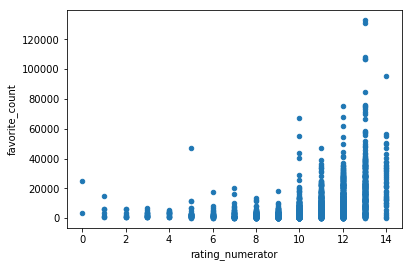

In [122]:
# look at the relationship between 'rating_numerator' and 'favorite count'

df[df['rating_numerator']<15].plot(x='rating_numerator',y='favorite_count',kind='scatter');


there is a relatin between rating_numerator and favorite_count and rating_numerator 13 got hightest favorite_count

### Which stage of dogs got the highest retweet counts ?

In [123]:
# we didnt need null value to analysis in our data frame
df_stage = df[df["stage"].isnull()==False]


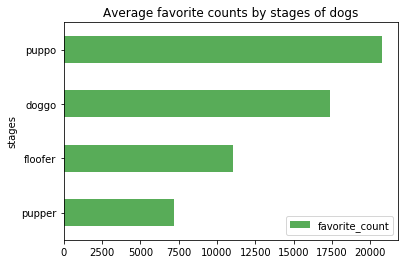

In [124]:
#visualization 'Average favorite counts by stages of dogs'
by_stages = df_stage.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"')
favorite_counts_by_stages = pd.DataFrame(by_stages.groupby('stage').favorite_count.mean().sort_values())
favorite_counts_by_stages['stages'] = favorite_counts_by_stages.index
favorite_counts_by_stages.plot(x="stages",y='favorite_count',kind='barh',title="Average favorite counts by stages of dogs",color='g', alpha=0.655)


Insight: The stage of Puppo got the highest retweet counts and favorite
counts, which is almost 3 times higher than the breed of pupper
its the same as retwet count and favourite count top 3 are the same. 

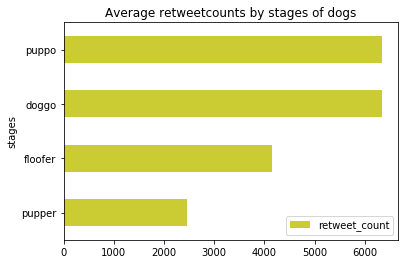

In [125]:
#visualization 'Average retweet counts by stages of dogs'

retweet_count_by_stages = pd.DataFrame(by_stages.groupby('stage').retweet_count.mean().sort_values())
retweet_count_by_stages['stages'] = favorite_counts_by_stages.index
retweet_count_by_stages.plot(x="stages",y='retweet_count',kind='barh',title="Average retweetcounts by stages of dogs",color='y', alpha=0.8)

insight: puppo ,doggo and floofer got the heighest retweet_ count so the top 3 is puppo adn doggo adn floofer lets see if it will be the same top 3 for the favourite tweet .



In [126]:
#df_join=pd.merge(retweet_count_by_stages, favorite_counts_by_stages, how='inner')

### Q3Analyzing number of tweets posted by WeRateDogs' over time

here we are tying to see what are the number of tweet changes over time 

In [127]:
df.timestamp = pd.to_datetime(df.timestamp)

In [128]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()


2015-11    299
2015-12    386
2016-01    189
2016-02    123
2016-03    133
2016-04     58
2016-05     59
2016-06     93
2016-07     96
2016-08     63
2016-09     69
2016-10     73
2016-11     58
2016-12     58
2017-01     70
2017-02     70
2017-03     57
2017-04     49
2017-05     45
2017-06     50
2017-07     53
2017-08      2
Name: timestamp, dtype: int64

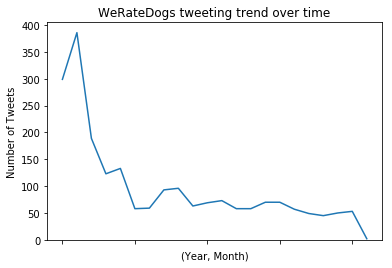

In [129]:
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot('line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

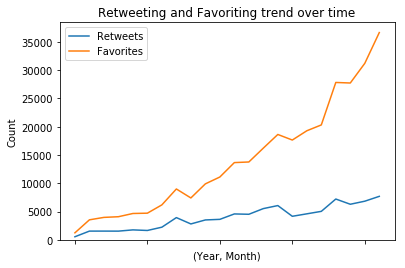

In [130]:
plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

so number of retweets and favorites tweets are increasing over time

WeRateDogs, a Twitter account started in 2015, tweeted a lot in its starting days. For example, it posted
around 300 tweets in the month of November 2015, which increased to around 350 tweets in exactly the next
month. However, its tweeting activity reduced drastically in the subsequent months, averaging between 50 to
100 since April, 2016 